In [1]:
#Import all libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Load dataset

X_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train.shape

(2000, 30000)

In [4]:
X_test.shape

(400, 30000)

In [5]:
X_train[1:]

array([[131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       [149., 173., 151., ...,  56.,  56.,  66.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

In [9]:
def plot_sample(X, y):
    index = random.randint(0, len(X))
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])

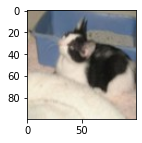

In [10]:
plot_sample(X_train, y_train)

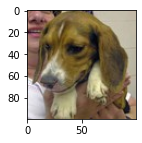

In [11]:
plot_sample(X_train, y_train)

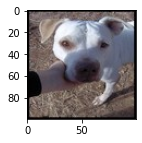

In [12]:
plot_sample(X_test, y_test)

In [25]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(32, (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(1, activation = 'sigmoid'))

In [26]:
cnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
cnn_model.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 10s 255ms/step - loss: 0.7366 - accuracy: 0.5190
Epoch 2/10
32/32 [==============================] - 8s 245ms/step - loss: 0.6759 - accuracy: 0.5675
Epoch 3/10
32/32 [==============================] - 8s 245ms/step - loss: 0.6123 - accuracy: 0.6670
Epoch 4/10
32/32 [==============================] - 8s 255ms/step - loss: 0.5434 - accuracy: 0.7295
Epoch 5/10
32/32 [==============================] - 9s 268ms/step - loss: 0.4602 - accuracy: 0.7920
Epoch 6/10
32/32 [==============================] - 9s 270ms/step - loss: 0.3909 - accuracy: 0.8260
Epoch 7/10
32/32 [==============================] - 8s 264ms/step - loss: 0.3302 - accuracy: 0.8645
Epoch 8/10
32/32 [==============================] - 8s 264ms/step - loss: 0.2723 - accuracy: 0.8880
Epoch 9/10
32/32 [==============================] - 9s 271ms/step - loss: 0.2078 - accuracy: 0.9230
Epoch 10/10
32/32 [==============================] - 8s 264ms/step - loss: 0.1537 - accuracy: 0.946

In [28]:
cnn_model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 37ms/step - loss: 0.9401 - accuracy: 0.6425


[0.9401299357414246, 0.6424999833106995]

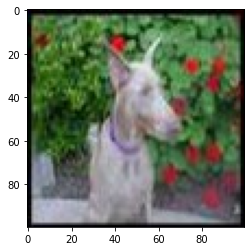

In [41]:
idx = random.randint(0, len(y_test))
plt.imshow(X_test[idx, :])
plt.show()

In [42]:
y_pred = cnn_model.predict(X_test[idx, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

1/1 [==============================] - 0s 21ms/step
Our model says it is a : dog
